In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
##Check effect of perturbation on max of jacobian
## Starting with random uniform x

In [15]:
d = 10
n = 10

In [16]:
#A = np.random.rand(d, d)
a = np.random.rand()
w = np.random.randn(d, 1)
w = np.ones((d,1))

In [17]:
def softmax(x):
    denom = np.exp(x).sum()
    num = np.exp(x)
    return num/denom

def row_softmax(Z):
    P = np.zeros_like(Z)
    for i in range(Z.shape[0]):
        P[i,:] = softmax(Z[i,:])
    return P

In [18]:
def jacobian(x):
    qk = a * x@x.T
    P = row_softmax(qk)
    J = np.zeros((n, n))
    for i in range(n):
        P_i = np.diag(P[i,:]) - P[i,:].T@P[i,:]
        for j in range(n):
            e_ji = np.zeros((n,n))
            e_ji[j,i] = 1.0
            #print((x.T@P_i).shape)
            J[i,j] = a * x.T @ P_i @ ( e_ji @ x + int(i==j) * x) + P[i,j]
    return J

In [19]:
def transformer(x):
    y = (row_softmax(a * x@x.T) @ x).T @ w
    return y[0,0]
    #return np.sigmoid(y)

In [20]:
def plot_max(x):
    init_y = transformer(x)
    eps_vals = list(np.arange(0, 0.5, 0.01))
    max_img = np.zeros((n, len(eps_vals)))
    max_args = np.zeros((n, len(eps_vals)))
    y_s = np.zeros((n, len(eps_vals)))
    for c in range(n):
        for e_idx, e in enumerate(eps_vals):
            e_vec = np.zeros_like(x)
            e_vec[c] = e
            y_s[c, e_idx] = transformer(x+e_vec)
            jac = jacobian(x+e_vec)
            max_img[c, e_idx] = np.linalg.norm(jac, ord=2)#np.max(np.abs(jacobian(x+e_vec)))
    plt.figure()
    plt.imshow(np.abs(y_s - init_y))
    plt.xlabel('eps')
    plt.colorbar()
    plt.title('Outputs')
    plt.figure()
    plt.imshow(max_img)
    plt.colorbar()
    plt.title('Max(J)')
    for i in range(n):
        fig = plt.figure()
        ax = fig.add_subplot(1,2,1)
        ax.plot(eps_vals, max_img[i,:])
        ax.set_xlabel('eps')
        ax.set_ylabel('max(J)')
        ax.set_title(f'Component changed:{i}')
        ax2 = fig.add_subplot(1,2,2)
        ax2. plot(eps_vals, y_s[i, :])
        ax2.set_xlabel('eps')
        ax2.set_ylabel('y')
        ax2.set_title('output')

[[0.27900878]
 [0.20909938]
 [0.0305334 ]
 [0.61622877]
 [0.74862666]
 [0.03639897]
 [0.72528196]
 [0.71646501]
 [0.14345058]
 [0.77776576]]


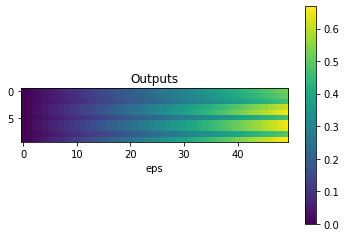

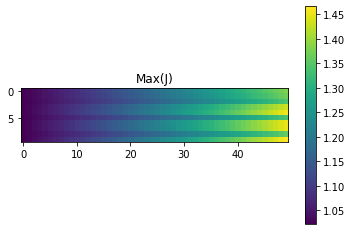

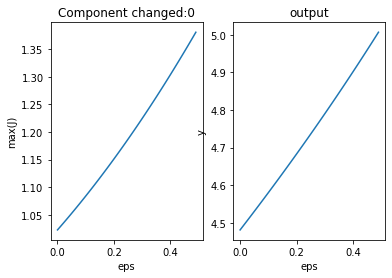

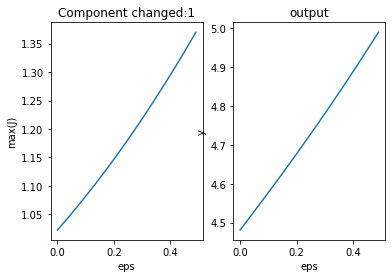

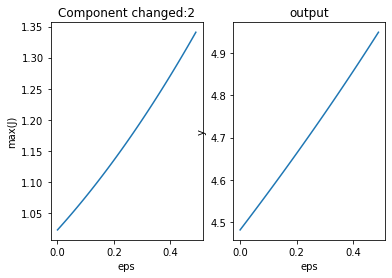

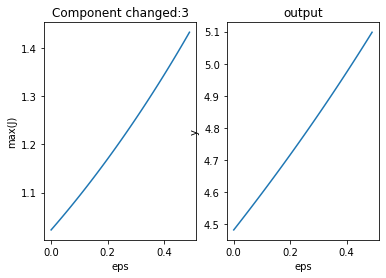

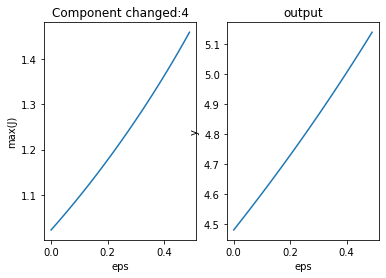

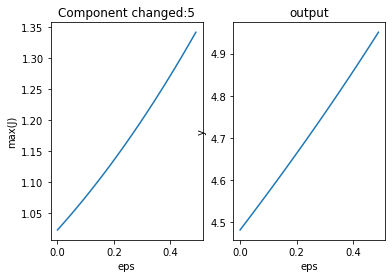

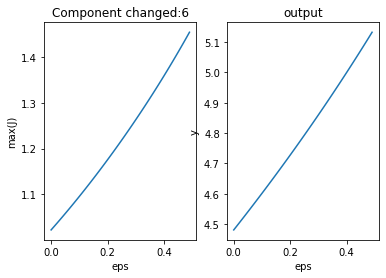

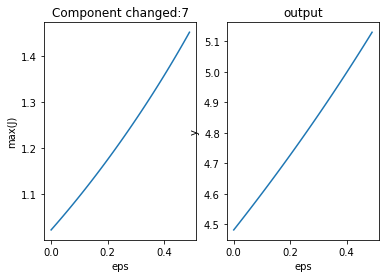

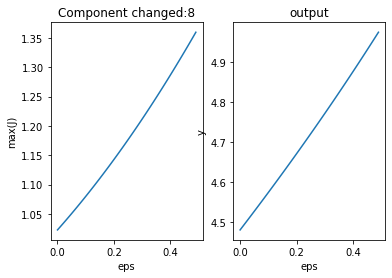

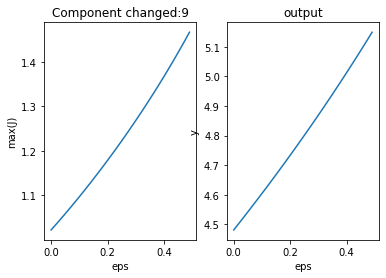

In [27]:
## Random uniform x

x = np.random.rand(10,1)
print(x)
plot_max(x)
J = jacobian(x)

In [28]:
## peaky x
x_peaky = np.ones((n, 1))*0.1
x_peaky[3] = 1.0

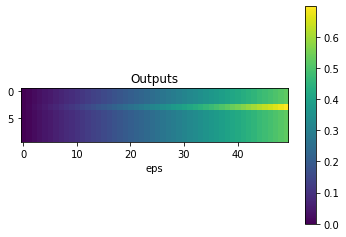

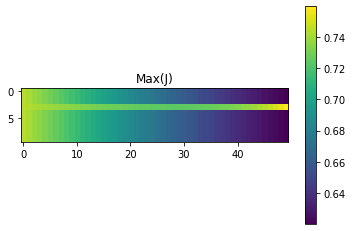

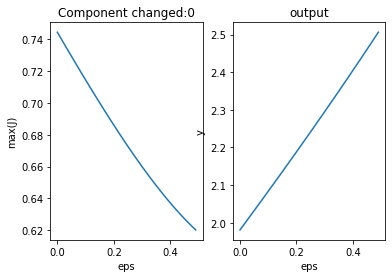

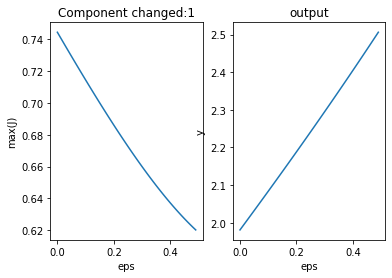

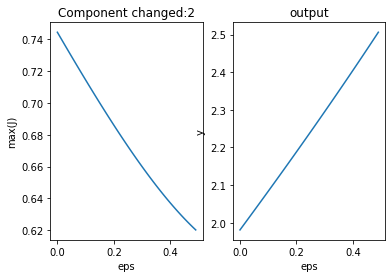

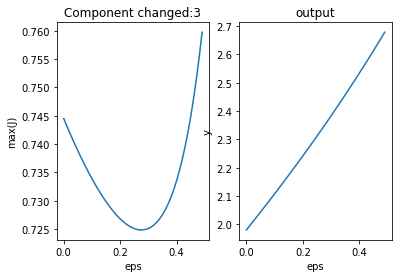

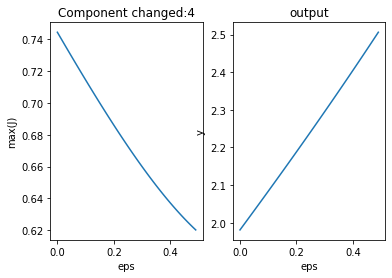

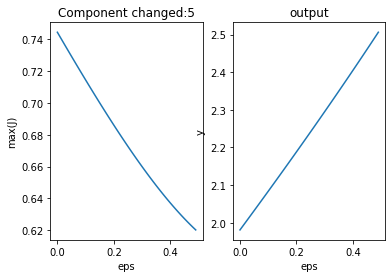

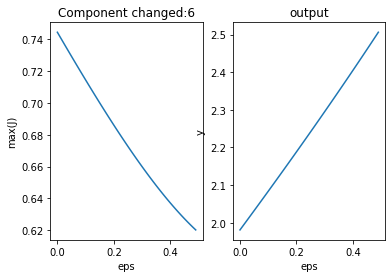

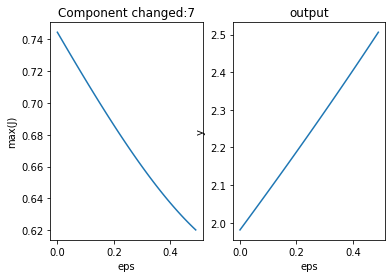

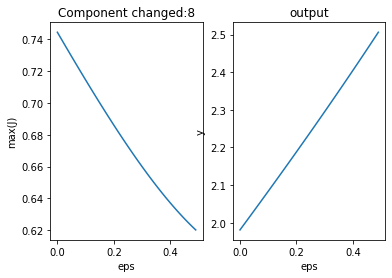

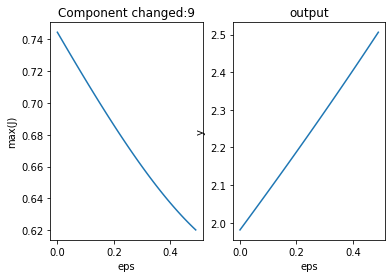

In [29]:
plot_max(x_peaky)

[[0.01563495]
 [0.06667368]
 [0.09096732]
 [0.0829874 ]
 [0.08161415]
 [0.00808305]
 [0.0221031 ]
 [0.0984125 ]
 [0.08058094]
 [0.07657608]]


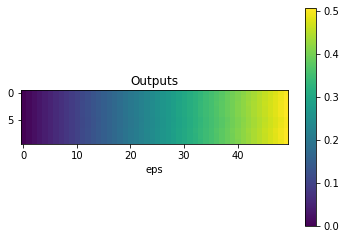

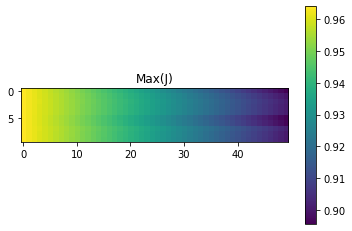

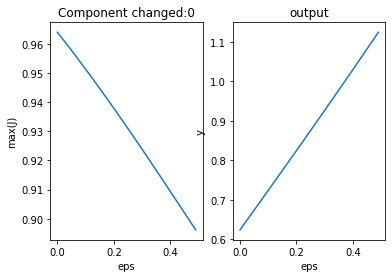

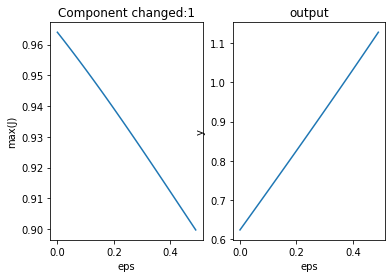

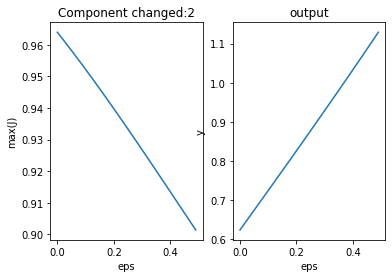

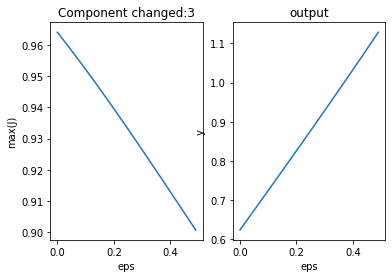

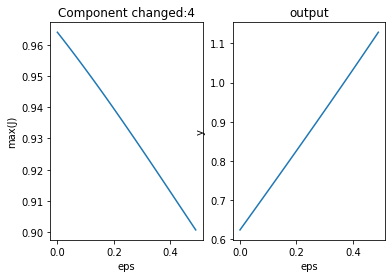

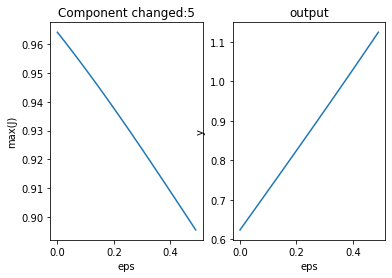

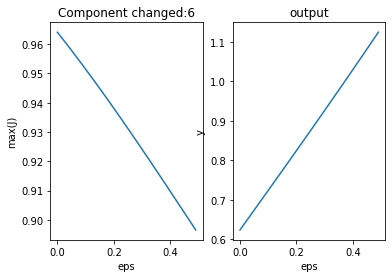

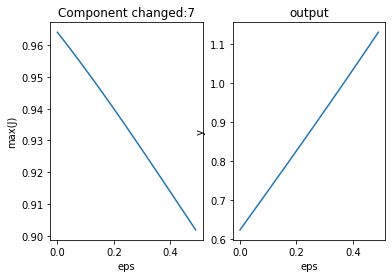

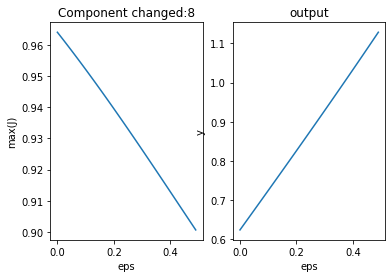

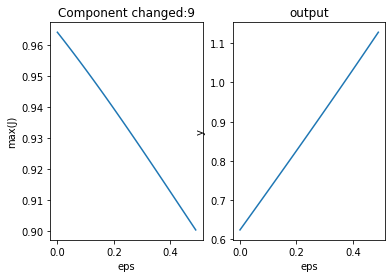

In [30]:
x_in = np.random.rand(10, 1)*0.1
print(x_in)
plot_max(x_in)

In [31]:
?np.random.rand

Docstring:
rand(d0, d1, ..., dn)

Random values in a given shape.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `random_sample`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

Create an array of the given shape and populate it with
random samples from a uniform distribution
over ``[0, 1)``.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    If no argument is given a single Python float is returned.

Returns
-------
out : ndarray, shape ``(d0, d1, ..., dn)``
    Random values.

See Also
--------
random

Examples
--------
>>> np.random.rand(3,2)
array([[ 0.14022471,  0.96360618],  #random
       [ 0.37601032,  0.25528411],  #random
       [ 0.49313049,  0.94909878]]) #random
Type:      builtin_function_or_method
